# 라이브러리

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기

In [2]:
train = pd.read_csv('C:/Users/bsh36/Desktop/Data/bike/train.csv')
test = pd.read_csv('C:/Users/bsh36/Desktop/Data/bike/test.csv')
sub = pd.read_csv('C:/Users/bsh36/Desktop/Data/bike/sampleSubmission.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# 전처리

In [11]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['Hour'] = train['datetime'].dt.hour
train['Month'] = train['datetime'].dt.month
train['Year'] = train['datetime'].dt.year
train['dayofweek'] = train['datetime'].dt.dayofweek

In [12]:
# 출 퇴근 시간에 대여 횟수가 많음
train.groupby('Hour')['count'].mean()

Hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

In [13]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Year,dayofweek,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,2012,2,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20,2012,2,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21,2012,2,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2012,2,12


<AxesSubplot:xlabel='holiday', ylabel='count'>

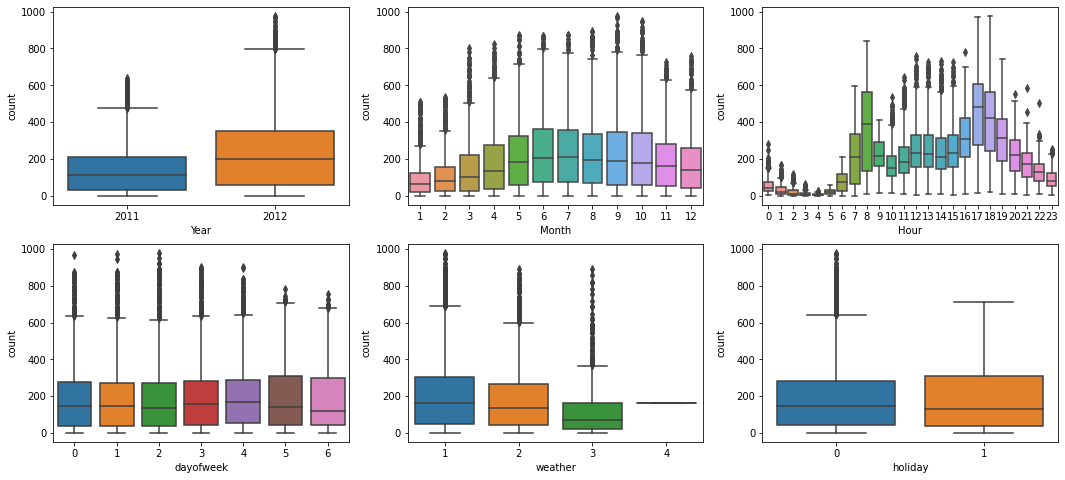

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.boxplot(data=train, x="Year", y="count", ax=ax1,showfliers=True)
sns.boxplot(data=train, x="Month", y="count", ax=ax2,showfliers=True)
sns.boxplot(data=train, x="Hour", y="count", ax=ax3,showfliers=True)
sns.boxplot(data=train, x="dayofweek", y="count", ax=ax4,showfliers=True)
sns.boxplot(data=train, x="weather", y="count", ax=ax5,showfliers=True)
sns.boxplot(data=train, x="holiday", y="count", ax=ax6,showfliers=True)



* 연도별 : 2012년 자전거 대여량이 더 많다.
* 월별 : 기온이 낮은 계절에는 대여량이 감소하고, 1월부터는 증가하는 추세임
* 시간별 : 출퇴근 시간에는 대여량이 많음
* 요일 : 대여량의 편차가 많이 나지는 않음
* 날씨 : 눈이나 비가오면 대여량이 낮음
* 휴일 : 휴일별로 차이가 크지 않음

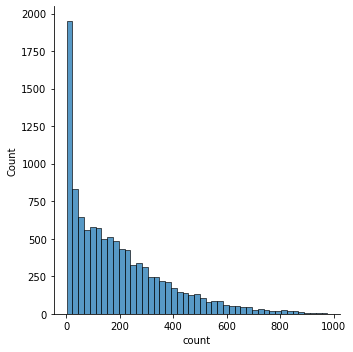

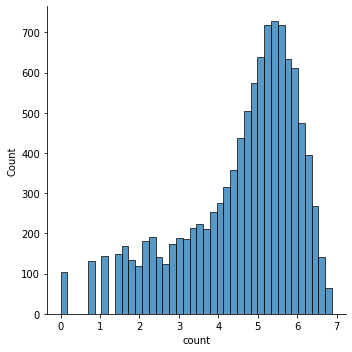

In [22]:
# 대여량의 편차가 크기 때문에 log적용 
sns.displot(x= train['count'])
sns.displot(np.log(train['count']))

In [26]:
train2 = train.drop(['casual','registered','count','datetime','Month'],axis=1)
train2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Hour,Year,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,0,2011,5
1,1,0,0,1,9.02,13.635,80,0.0000,1,2011,5
2,1,0,0,1,9.02,13.635,80,0.0000,2,2011,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,2011,5
4,1,0,0,1,9.84,14.395,75,0.0000,4,2011,5
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,2012,2
10882,4,0,1,1,14.76,17.425,57,15.0013,20,2012,2
10883,4,0,1,1,13.94,15.910,61,15.0013,21,2012,2
10884,4,0,1,1,13.94,17.425,61,6.0032,22,2012,2


In [24]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['Hour'] = test['datetime'].dt.hour
test['Year'] = test['datetime'].dt.year
test['dayofweek'] = test['datetime'].dt.dayofweek

In [27]:
test2 = test.drop(['datetime'],axis=1)
test2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Hour,Year,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,2012,0
6489,1,0,1,2,10.66,12.880,60,11.0014,20,2012,0
6490,1,0,1,1,10.66,12.880,60,11.0014,21,2012,0
6491,1,0,1,1,10.66,13.635,56,8.9981,22,2012,0


# 모델링

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)

In [29]:
rf.fit(train2,np.log(train['count']))

RandomForestRegressor(n_jobs=-1)

In [30]:
result = rf.predict(test2)

In [31]:
pd.Series(rf.feature_importances_,index=test2.columns).sort_values(ascending=False)

Hour          0.754773
temp          0.048097
workingday    0.038763
season        0.034922
Year          0.031132
dayofweek     0.028938
humidity      0.021104
atemp         0.018698
windspeed     0.011259
weather       0.010745
holiday       0.001569
dtype: float64

In [32]:
sub['count'] = np.exp(result)
sub

,datetime,count
0,2011-01-20 00:00:00,11.473079
1,2011-01-20 01:00:00,4.247061
2,2011-01-20 02:00:00,3.392434
3,2011-01-20 03:00:00,2.819755
4,2011-01-20 04:00:00,2.309946
...,...,...
6488,2012-12-31 19:00:00,214.985019
6489,2012-12-31 20:00:00,156.311480
6490,2012-12-31 21:00:00,99.664490
6491,2012-12-31 22:00:00,100.936444


In [33]:
sub.to_csv('C:/Users/bsh36/Desktop/Data/bike/rf.csv',index=False)